Library imports and loading file

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data =  pd.read_csv('/content/diamonds_new.csv')
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


Null value check and filling

In [4]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

array([[<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'carat'}>]], dtype=object)

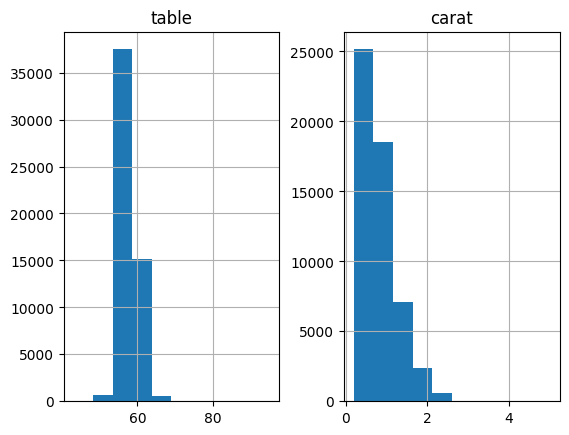

In [10]:
figdata = data[['table','carat']]
figdata.hist()

Data Filling

In [18]:
data['color'] = data['color'].fillna(data['color'].mode()[0]) #object type: using mode to fill Nan
data['carat'] = data['carat'].fillna(data['carat'].median()) #skewed data: using median to fill Nan
data['table'] = data['table'].fillna(data['table'].median()) #with outliers: using median to fill Nan

In [14]:
data.isna().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

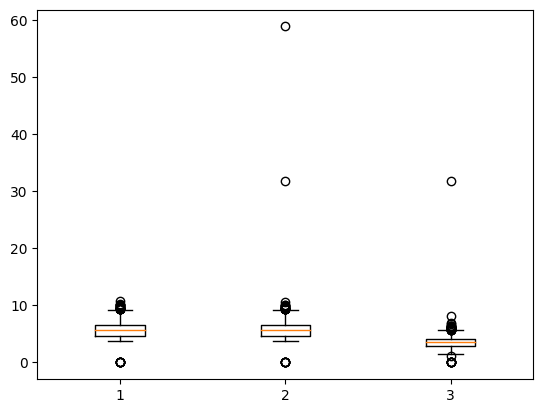

In [15]:
#checking for outliers in independent variables
num_columns = ['x','y','z']
plt.boxplot(data[num_columns])
plt.show()

In [19]:
#Handling Outliers and clipping
for i in ['x','y','z']:
  q1 = np.percentile(data[i], 25, method = 'midpoint')
  q2 = np.percentile(data[i], 50, method = 'midpoint')
  q3 = np.percentile(data[i], 75, method = 'midpoint')
  print('q1 for ',i, ': ',q1,'\nq2 for ',i, ': ',q2,'\nq3 for ',i, ': ',q3)
  IQR = q3-q1
  print('IQR for ',i, ': ',IQR)
  low_lim = q1 - 1.5*IQR
  up_lim = q3 + 1.5*IQR
  print('lower whisker for ',i,' :', low_lim,'\nupper whisker for ',i,' :', up_lim)
  outlier =[]
  for x in data[i]:
    if(x<low_lim or x>up_lim):
      outlier.append(x)
  print('Outlier for ',i,': ',outlier)
  data[i] = data[i].clip(lower = low_lim, upper = up_lim)

q1 for  x :  4.71
q2 for  x :  5.7
q3 for  x :  6.54
IQR for  x :  1.83
lower whisker for  x  : 1.9649999999999999
upper whisker for  x  : 9.285
Outlier for  x :  [0.0, 0.0, 0.0, 9.54, 9.38, 9.53, 9.44, 9.49, 9.65, 0.0, 9.42, 9.44, 9.32, 10.14, 10.02, 0.0, 9.42, 10.01, 9.86, 9.3, 10.0, 10.74, 0.0, 9.36, 10.23, 9.51, 9.44, 9.66, 9.35, 9.41, 0.0, 0.0]
q1 for  y :  4.72
q2 for  y :  5.71
q3 for  y :  6.54
IQR for  y :  1.8200000000000003
lower whisker for  y  : 1.9899999999999993
upper whisker for  y  : 9.27
Outlier for  y :  [0.0, 0.0, 9.38, 9.31, 9.48, 58.9, 9.4, 9.42, 9.59, 0.0, 9.37, 10.1, 9.94, 0.0, 9.34, 9.94, 9.81, 9.85, 10.54, 0.0, 9.31, 10.16, 9.46, 9.38, 9.63, 9.32, 31.8, 0.0, 0.0]
q1 for  z :  2.91
q2 for  z :  3.53
q3 for  z :  4.04
IQR for  z :  1.13
lower whisker for  z  : 1.2150000000000003
upper whisker for  z  : 5.734999999999999
Outlier for  z :  [0.0, 0.0, 1.07, 0.0, 5.77, 5.76, 5.97, 5.98, 5.91, 5.79, 6.38, 8.06, 5.85, 5.92, 6.03, 0.0, 6.17, 6.24, 5.75, 6.16, 0.0, 6.27

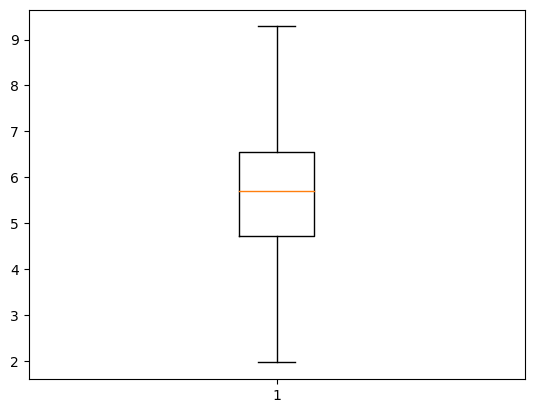

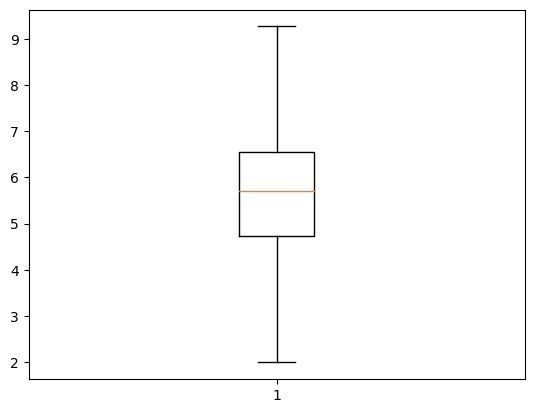

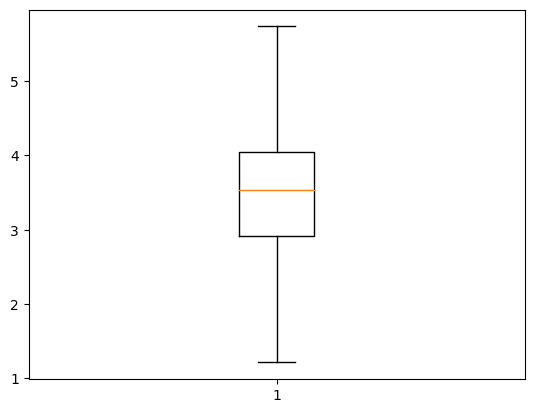

In [21]:
for i in ['x','y','z']:
  plt.boxplot(data[i])
  plt.show()

Data Encoding using Label Encoding

In [22]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [23]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [24]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [25]:
#label encoding for cut,color and clarity
import sklearn.preprocessing as sk
x_le = sk.LabelEncoder()
for i in ['clarity','color','cut']:
    data[i] = x_le.fit_transform(data[i])

In [27]:
data.head()

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,1,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,1,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,1,4,65.0,4.05,4.07,2.31,163.5
3,0.29,3,5,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,6,3,58.0,4.34,4.35,2.75,167.5


In [26]:
data.describe()

,carat,cut,color,clarity,table,x,y,z,price_new
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.553003,2.594197,3.835150,57.457184,5.731285,5.733311,3.539131,1966.399861
std,0.474011,1.027708,1.701105,1.724591,2.234491,1.119956,1.111950,0.691776,1994.719869
min,0.200000,0.000000,0.000000,0.000000,43.000000,1.965000,1.990000,1.215000,163.000000
25%,0.400000,2.000000,1.000000,2.000000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,2.000000,3.000000,4.000000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,3.000000,4.000000,5.000000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,4.000000,6.000000,7.000000,95.000000,9.285000,9.270000,5.735000,9411.500000


Scaling and Normalization

In [38]:
#loading data and dropping all columns other than independent variables

data2 = pd.read_csv('/content/diamonds_new.csv')
X=data2.drop(['cut','color','clarity','table','price_new'],axis=1)

In [39]:
#data filling for carat column
X['carat'] = X['carat'].fillna(X['carat'].median()) #skewed data: using median to fill Nan
X.describe()

,carat,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,5.731157,5.734526,3.539635
std,0.474011,1.121761,1.142135,0.703869
min,0.200000,0.000000,0.000000,0.000000
25%,0.400000,4.710000,4.720000,2.910000
50%,0.700000,5.700000,5.710000,3.530000
75%,1.040000,6.540000,6.540000,4.040000
max,5.010000,10.740000,58.900000,31.800000


Standard Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc = sc.fit_transform(X)
x_sc = pd.DataFrame(x_sc)
x_sc.describe()

,0,1,2,3
count,5.394000e+04,5.394000e+04,5.394000e+04,5.394000e+04
mean,2.444878e-16,2.782103e-16,-8.430615e-17,-1.264592e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-1.261458e+00,-5.109120e+00,-5.020931e+00,-5.028871e+00
25%,-8.395232e-01,-9.103248e-01,-8.882800e-01,-8.945421e-01
50%,-2.066210e-01,-2.777553e-02,-2.147398e-02,-1.368844e-02
75%,5.106683e-01,7.210542e-01,7.052421e-01,7.108847e-01
max,8.886075e+00,4.465203e+00,4.654965e+01,4.015040e+01


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

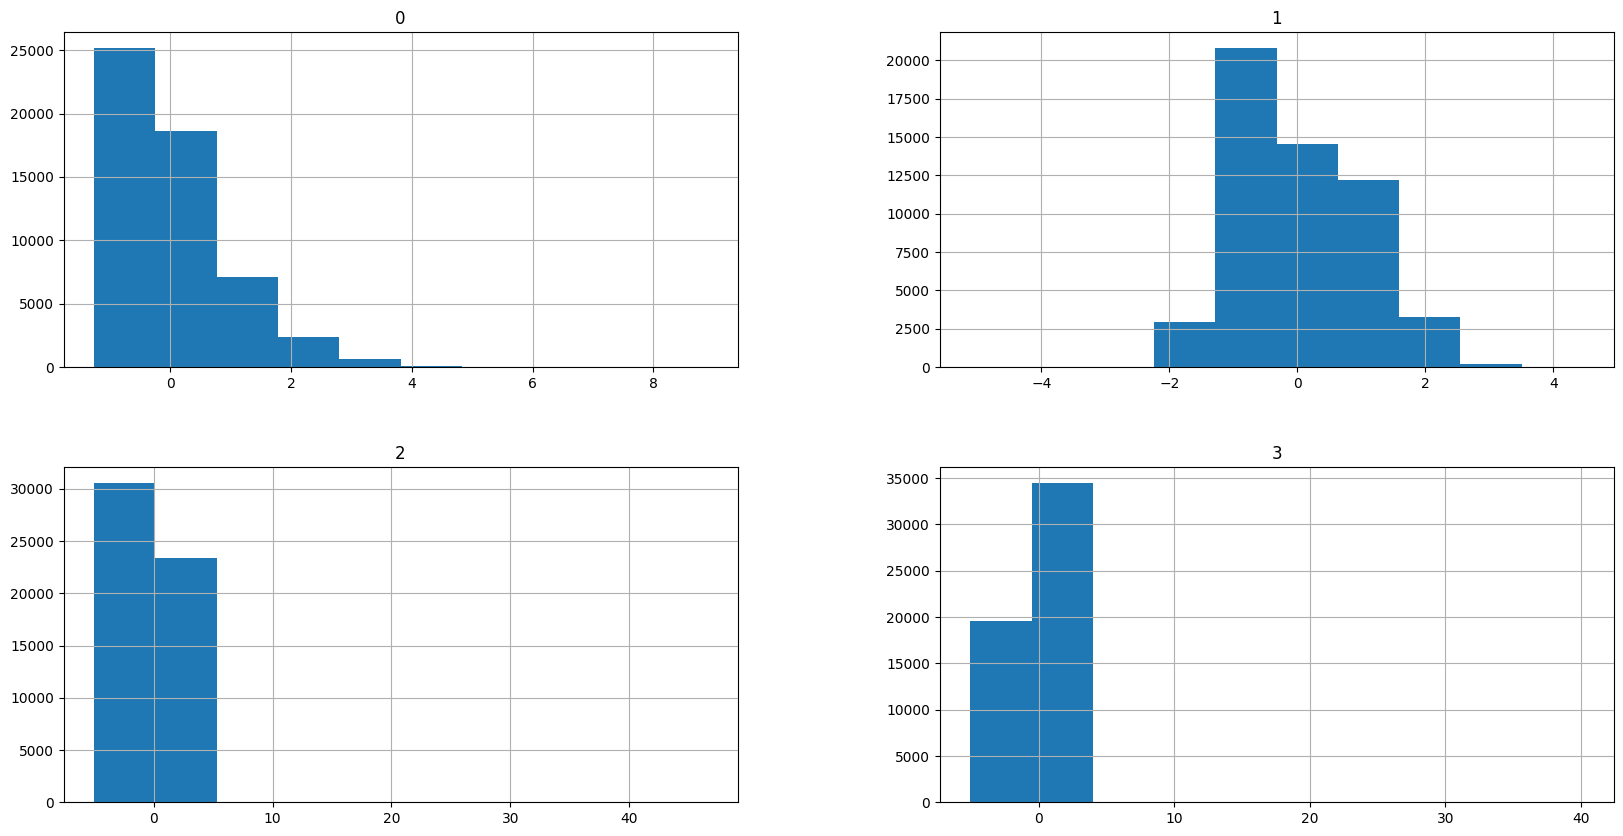

In [33]:
x_sc.hist(figsize = (20,10))

Normalization

In [34]:
import sklearn
x_norm = sklearn.preprocessing.normalize(X)
x_norm = pd.DataFrame(x_norm)
x_norm.describe()

,0,1,2,3
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.083451,0.645083,0.645520,0.398429
std,0.034365,0.009669,0.009437,0.009998
min,0.015633,0.000000,0.000000,0.000000
25%,0.054460,0.642736,0.642819,0.394715
50%,0.079801,0.645040,0.646163,0.399146
75%,0.103573,0.647689,0.648892,0.402770
max,1.000000,0.780681,0.987188,0.974783


Correlation for all independent and dependent variables

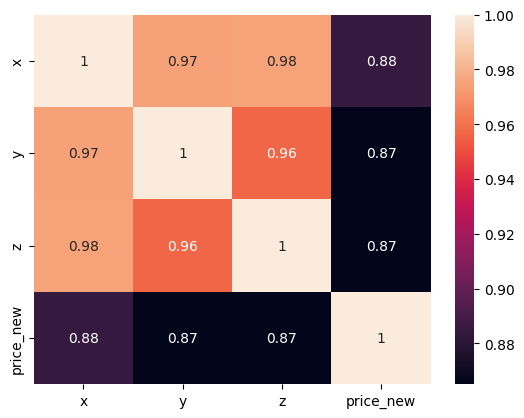

In [41]:
import seaborn as sns
X_corr = data2.drop(['carat','cut','color','clarity','table'], axis = 1)
sns.heatmap(X_corr.corr(), annot = True)
plt.show()